Total Epochs: 100000
P(B_2 = 1 | Z = 128) = 0.0934654915645672
P(B_5 = 1 | Z = 128) = 0.09148419592434007
P(B_8 = 1 | Z = 128) = 0.9059261103727173
P(B_10 = 1 | Z = 128) = 0.0


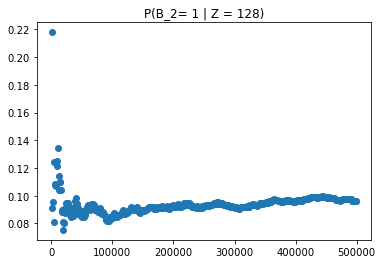

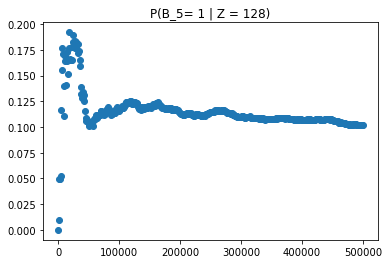

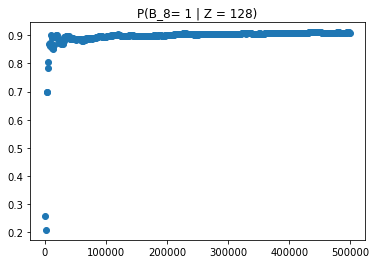

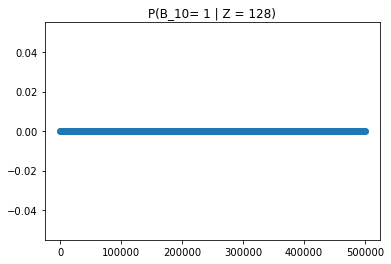

In [1]:
# Jiping Lin A15058075
# CSE 250A HW3 3.6.b 3.6.c
import random
import math
import numpy as np
import matplotlib.pyplot as plt


# 3.6.b
# [B_10, B_9, ..., B_1]
def bi_ran() -> list:
    res = []
    for i in range(10):
        res.append(random.randint(0, 1))
    return res


def fb(B: list) -> int:
    res = 0
    for i in range(len(B)):
        res += math.pow(2, len(B) - i - 1) * B[i]
    return int(res)


def pzb(z: int, B: list, alpha: float) -> float:
    return (1 - alpha) / (1 + alpha) * math.pow(alpha, math.fabs(z - fb(B)))


def trail(n, i, z, alpha):
    denom = 0
    num = 0
    for k in range(n):
        B = bi_ran()
        denom += pzb(z, B, alpha)
        num += pzb(z, B, alpha) * B[len(B) - i]
    return num / denom


def plot(k):
    x = []
    y = []
    denom = 0
    num = 0
    for i in range(500000):
        B = bi_ran()
        denom += pzb(128, B, 0.1)
        num += pzb(128, B, 0.1) * B[len(B) - k]
        if i % 1000 == 0:
            if denom == 0:
                continue
            x.append(i)
            y.append(num / denom)
    plt.scatter(x, y)
    plt.title(f"P(B_{k}" "= 1 | Z = 128)")
    plt.show()


def main():
    print("Total Epochs: 100000")
    print("P(B_2 = 1 | Z = 128) = " + str(trail(100000, 2, 128, 0.1)))
    print("P(B_5 = 1 | Z = 128) = " + str(trail(100000, 5, 128, 0.1)))
    print("P(B_8 = 1 | Z = 128) = " + str(trail(100000, 8, 128, 0.1)))
    print("P(B_10 = 1 | Z = 128) = " + str(trail(100000, 10, 128, 0.1)))
    plot(2)
    plot(5)
    plot(8)
    plot(10)


if __name__ == '__main__':
    main()
